In [1]:
import yaml
from gammapy_tools.make_background import prepare_dataset, run_make_background
from gammapy_tools.templates import get_config
from glob import glob

# Working with config files

An example [crab config file](../config_crab.yaml) is provided. 

Using the provided config file only the paths need to be changed

In [2]:
config = get_config()

In [3]:
# Modify the paths to various data stores

config['io']["search_datastore"] = "/raid/RAID1/VERITAS_Data/Background/MegaStore/moderate2tel_runwise"
config['io']['in_dir'] = "/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/"
config['io']['out_dir'] = "/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/"
config['io']['results_dir'] = "/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/"
config['io']['3d_bkg'] = False

# Other option
# config['io']['from_run'] = True
config['background_selection']['smooth'] = True
config['background_selection']['smooth_sigma'] = 1.0

# Whether or not to use KL divergence to search for runs
config['background_selection']['KL_DIV'] = False

# Number of parallel jobs
config['config']['njobs'] = 10


# Prepare Dataset

The `prepare_dataset` function will search for the runs of interest listed in  `config["run_selection"]["runlist"]` and query the datastore `config['io']["search_datastore"]`. A copy of these files will be made in  `config['io']['in_dir']`.  Any runs not found in `config['io']["search_datastore"]`  will be reported in `config["run_selection"]["missing_runs"]`.

In [4]:
config = prepare_dataset(config)

Written to /raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis//config.yaml


In [5]:
config["run_selection"]["missing_runs"]

[]

In [6]:
created_files = glob(config["io"]["in_dir"] + "/*")

In [7]:
created_files

['/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/64080.anasum.fits',
 '/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/obs-index.fits.gz',
 '/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/64081.anasum.fits',
 '/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/hdu-index.fits.gz',
 '/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/64083.anasum.fits',
 '/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/config.yaml',
 '/raid/RAID1/VERITAS_Data/gammapy/Crab_Analysis/64082.anasum.fits']

# Make the background

Create backgrounds for each run using the `run_make_background` function. This takes the files in `config['io']['in_dir']`. If `config['io']['from_run'] == True` then the backgrounds are generated from each run. If `config['io']['in_dir'] == False` then `config['io']["search_datastore"]` will be queried for each run to find suitable background runs. In both cases, known sources and bright stars are removed when estimating the bacgkround.

The files with 2D backgrounds are saved to `config['io']['out_dir']`.

In [8]:
config = run_make_background(config)

/home/obriens/mambaforge/envs/gammapy-tools/lib/python3.11/site-packages/astropy/utils/decorators.py:837: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/obriens/mambaforge/envs/gammapy-tools/lib/python3.11/site-packages/astropy/utils/decorators.py:837: GammapyDeprecationWarning: The radec function is deprecated and may be removed in a future version.
  val = self.fget(obj)


# Quick look at data

Load in the data and take a "peek"

In [9]:
from gammapy.data import DataStore

In [10]:
my_data = DataStore.from_dir(config["io"]["out_dir"])

In [11]:
my_observations = my_data.get_observations()

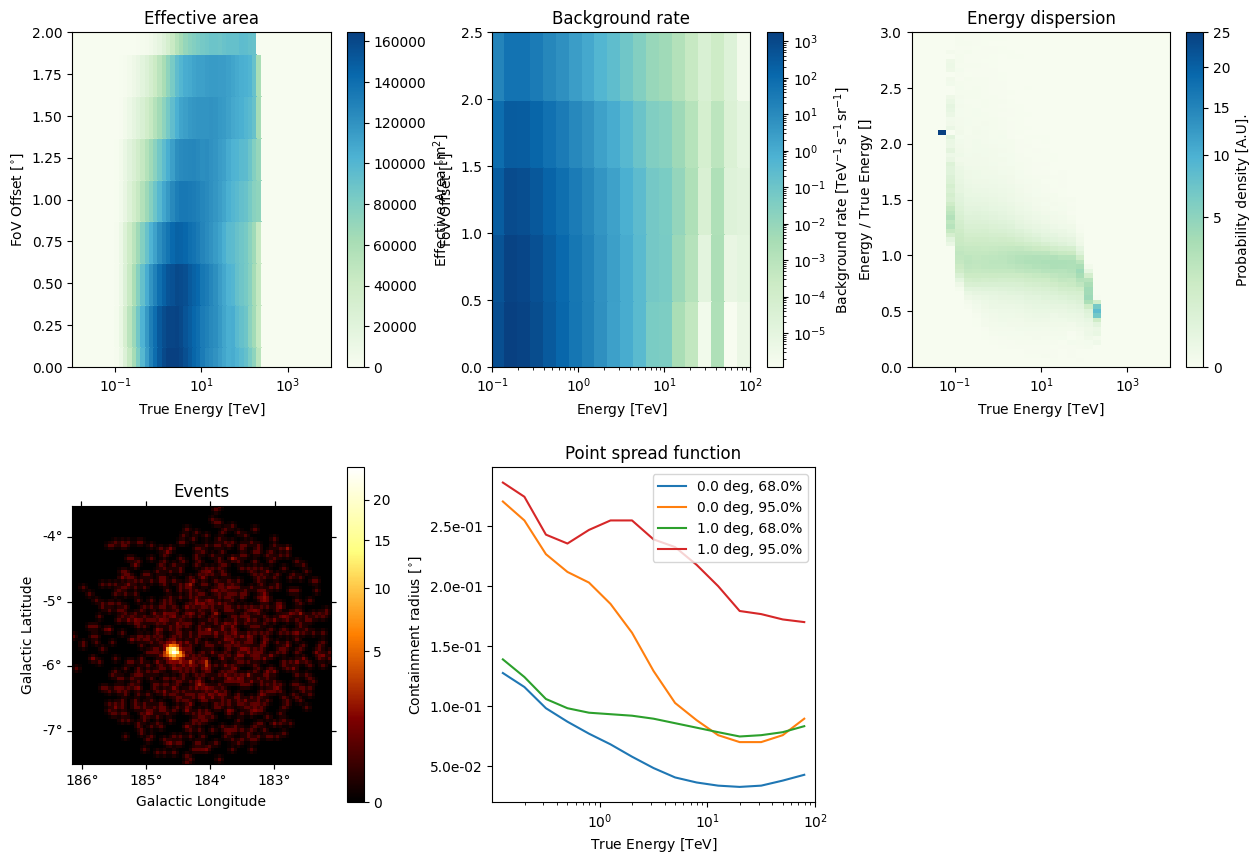

In [12]:
my_observations[0].bkg.peek()

# Summary

What we've done:

1. Extracted runs of interest from a larger DataStore.
2. (If `from_run == False`) Queried the larger DataStore for runs that are suitable as background runs.
3. Generated backgrounds for these runs and attached them to the runs.


At this stage the DataStore located at `config['io']['out_dir']` is ready for a 2D analysis (ring background skymaps).
